In [95]:
import math

import pandas as pd
from nltk.stem import PorterStemmer
from nltk import word_tokenize

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import TfidfModel

import utils

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [96]:
stemmer = PorterStemmer()

In [6]:
tdf = pd.read_csv('transcripts_enhanced.csv')
tdf_g = pd.read_csv('speaker_grouped.csv')

In [8]:
tdf_g['tokens'] = tdf_g['text_enhanced'].apply(lambda x : utils.process(x, stemmer=stemmer)) 

In [10]:
texts = tdf_g['tokens'].tolist()

In [50]:
tdf_g['tokens']

0       [good, afternoon, everyon, get, start, would, ...
1       [main, chang, forecast, intern, side, driven, ...
2       [secretari, economist, donald, kohn, deputi, s...
3       [would, like, hear, governor, kelley, 's, long...
4       [peter, thank, memorandum, detail, complet, se...
                              ...                        
4496    [n't, think, norm, statement, think, forecast,...
4497    [lori, exhibit, 2, chart, 12, would, explain, ...
4498    [thank, begin, second, exhibit, discuss, money...
4499    [thank, madam, chair, report, receiv, contact,...
4500    [move, 're, say, flat, --, go, ahead, question...
Name: tokens, Length: 4501, dtype: object

In [163]:
dictionary = Dictionary(texts)
dictionary


In [165]:

corpus = [dictionary.doc2bow(text) for text in texts]

In [154]:
len(dictionary)
# len(texts[0])
# dictionary.doc2bow(texts[0])

26670

In [57]:
bow = dictionary.doc2bow(texts[0])
total = 0
for token, count in bow:
    total += count
print(total)

3695


In [92]:
count = 0

freqs = {}
doc_appears = {}

for text in texts:
    # print(text)
    # print(dictionary.doc2bow(text))
    # print(model[dictionary.doc2bow(text)])
    for token, freq in dictionary.doc2bow(text):
        if token in freqs:
            freqs[token] += freq
        else:
            freqs[token] = freq
        if token in doc_appears:
            doc_appears[token] += 1
        else:
            doc_appears[token] = 1
    count +=1
    # if count > 10000:
        # break
print(freqs)
print(doc_appears)

{0: 15132, 1: 10151, 2: 50828, 3: 9801, 4: 34498, 5: 197, 6: 205, 7: 54, 8: 58, 9: 52, 10: 52, 11: 50, 12: 52, 13: 846, 14: 85, 15: 51, 16: 53, 17: 793, 18: 47, 19: 892, 20: 318, 21: 410, 22: 48, 23: 2, 24: 269, 25: 512, 26: 159, 27: 104, 28: 42, 29: 221, 30: 442, 31: 78, 32: 7163, 33: 145, 34: 112, 35: 1264, 36: 727, 37: 185, 38: 186, 39: 3439, 40: 35, 41: 61, 42: 911, 43: 40, 44: 304, 45: 104, 46: 101, 47: 2672, 48: 52, 49: 77, 50: 61, 51: 578, 52: 193, 53: 97, 54: 2540, 55: 41, 56: 1332, 57: 77, 58: 73, 59: 500, 60: 72, 61: 41, 62: 70, 63: 561, 64: 72, 65: 14780, 66: 127, 67: 15, 68: 922, 69: 189, 70: 721, 71: 2081, 72: 34, 73: 1115, 74: 478, 75: 490, 76: 2922, 77: 1305, 78: 4767, 79: 6129, 80: 7489, 81: 1378, 82: 5, 83: 2092, 84: 1684, 85: 168, 86: 3972, 87: 928, 88: 1164, 89: 296, 90: 1404, 91: 311, 92: 1936, 93: 2337, 94: 4310, 95: 919, 96: 402, 97: 1964, 98: 145, 99: 2, 100: 14, 101: 43, 102: 1698, 103: 2246, 104: 14761, 105: 520, 106: 4129, 107: 234, 108: 3, 109: 15, 110: 3010,

In [113]:
dictionary[500]

'help'

In [123]:
idf = {i: math.log(len(texts) / doc_appears[i]) for i in range(len(dictionary))}

In [124]:
idf

{0: 0.4010314941064919,
 1: 0.5426531607158434,
 2: 0.11177468344026897,
 3: 0.510677519500317,
 4: 0.21699718239785548,
 5: 3.336881058059106,
 6: 3.306109399392352,
 7: 4.4608111547115055,
 8: 4.369003605458382,
 9: 4.480229240568607,
 10: 4.480229240568607,
 11: 4.500031867864786,
 12: 4.4608111547115055,
 13: 2.03873508371592,
 14: 4.042607020825911,
 15: 4.5202345751823065,
 16: 4.441762959740811,
 17: 1.9631654791460753,
 18: 4.561907271582874,
 19: 1.904777160907921,
 20: 2.8099360524132315,
 21: 2.5890089778099137,
 22: 4.748493227163286,
 23: 7.718907692732987,
 24: 3.0275598105038437,
 25: 2.493161019019786,
 26: 3.7115745075005164,
 27: 4.107989780088763,
 28: 4.828535934836823,
 29: 3.343150671072701,
 30: 2.8399008411151683,
 31: 4.177948368695674,
 32: 0.6753111908394372,
 33: 3.591773307687896,
 34: 3.76766397415156,
 35: 1.624209890983353,
 36: 2.1335334491270883,
 37: 3.276256436242671,
 38: 3.2529995740784035,
 39: 0.9333200477250578,
 40: 4.885694348676771,
 41: 4.50

In [128]:
tfidf_global = {i: idf[i] * (1 + math.log(freqs[i])) for i in range(len(dictionary))}

In [138]:
tfidf_vals = sorted([rank for rank in tfidf_global.values()], reverse=True)

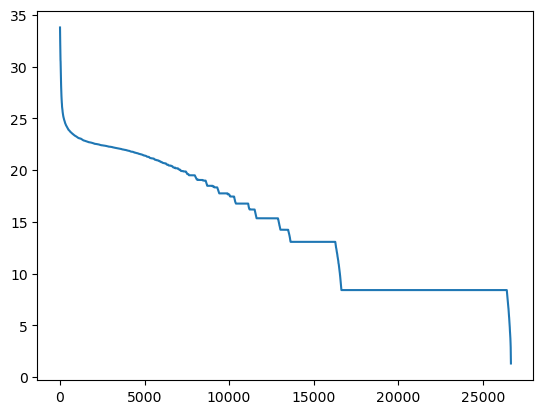

In [139]:
plt.plot(tfidf_vals)

In [155]:
tokens_to_keep = [i for i, tfidf in tfidf_global.items() if tfidf > tfidf_vals[15000]]
len(tokens_to_keep)

13637

In [164]:
dictionary.filter_tokens(good_ids=tokens_to_keep)
len(dictionary)
dictionary.compactify()

### EVENTUALLY USE MORE SOPHISTICATED PROCEDURE TO SELECT NUMBER OF TOPICS

In [166]:
ldamodel = LdaModel(corpus, num_topics=40, id2word=dictionary, passes=5, random_state=0, minimum_probability=0)

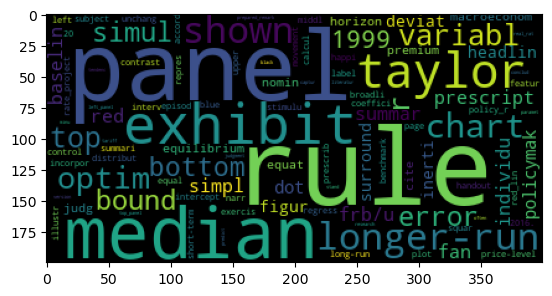

In [208]:
plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(0, 200))))

In [ ]:
for i in range(45):
    print(nmf.show_topic(i, 10)[0:5])
    print('\n')

In [487]:
def get_max_topic(tokens):
    topic_probs = nmf[dictionary.doc2bow(tokens)]
    if len(topic_probs) > 0:
        max_prob = topic_probs[0][1]
        max_ind = 0
        for i in range(1, len(topic_probs)):
            if topic_probs[i][1] > max_prob:
                max_prob = topic_probs[i][1]
                max_ind = i
        return pd.Series([topic_probs[max_ind][0], max_prob], index=['topic', 'prob'])
    return pd.Series([None, None], index=['topic', 'prob'])

get_max_topic(tdf.loc[205].tokens)

[(0, 0.22982931844332238), (3, 0.006064672707542939), (4, 0.00411476679532423), (5, 0.31380085446080264), (6, 0.10521444370169349), (9, 0.0007210869601999902), (18, 0.21149594909681899), (19, 0.014213836399375282), (20, 0.003915786899366396), (23, 0.0019623029518893373), (25, 0.029323307179473786), (32, 0.0017333808246226285), (33, 0.06890445417181804), (35, 0.006816483192542763), (41, 0.0018893562152070187)]


topic    5.000000
prob     0.313801
dtype: float64

In [18]:
def get_all_topics(tokens):
    topic_probs = ldamodel[dictionary.doc2bow(tokens)]
    result = [0] * 45
    for topic, prob in topic_probs:
        result[topic] = prob
    return pd.Series(result)

In [56]:
tdf[[f'tprob_{i}' for i in range(45)]] = tdf.tokens.apply(get_all_topics)

<Axes: xlabel='date'>

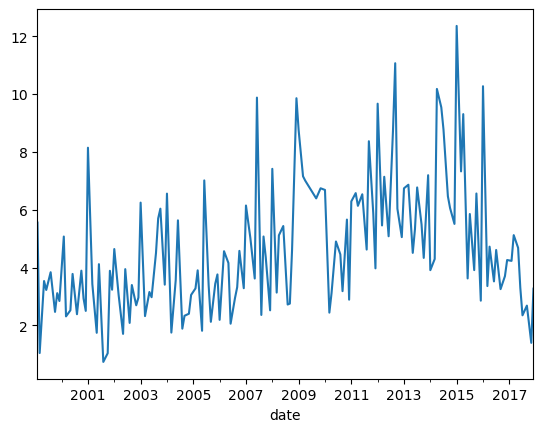

In [587]:
mtdf = tdf[tdf['type'] == 'meeting'] 
mtdf[['tprob_35', 'date']].groupby(pd.PeriodIndex(mtdf['date'], freq='M'))['tprob_35'].sum().plot()

In [472]:
tdf_sample = tdf.sample(5000)

In [473]:
tdf_sample[['topic','topic_prob']] = tdf_sample.tokens.apply(get_topics)

In [479]:
tdf_sample[tdf_sample['topic'] == 5][['content', 'topic_prob']].to_csv('topictest.csv')

In [201]:
sdf[['topic', 'topic_prob']] = sdf.tokens.apply(get_topics)

In [202]:
tdf[['topic', 'topic_prob']] = tdf.tokens.apply(get_topics)

In [ ]:
for item in sdf[sdf['topic'] == 6.0]['text'][:25]:
    print(item)

In [209]:
path = "Loughran-McDonald_MasterDictionary_1993-2021.csv"

lm_df = pd.read_csv(path)

lm = {}

for i, row in lm_df.iterrows():
    # print(row)
    word = str(row['Word']).lower()
    if row['Negative'] != 0:
        lm[word] = -1
    if row['Positive'] != 0:
        lm[word] = 1

In [219]:
def sentscore(string):
    # tokens = process(string)
    total = 0
    tokens = [token.lower() for token in word_tokenize(str(string))]
    numtokens = len(tokens) if len(tokens) > 0 else 1
    for token in tokens:
        # print(token)
        if token in lm:
            total += lm[token]
            # print(token)
            # print(lm[token])
    # print(total)
    # print(tokens)
    return total

In [220]:
tdf['lm_sent'] = tdf['content'].apply(sentscore)

In [221]:
sdf['lm_sent'] = sdf['text'].apply(sentscore)

In [225]:
speech_infl = sdf[sdf['topic'] == 9][['date', 'lm_sent']]
speech_infl['date'] = pd.to_datetime(speech_infl['date'])
sinfdf = speech_infl.groupby(pd.PeriodIndex(speech_infl['date'], freq='M'))['lm_sent'].sum()

In [229]:
transcript_infl = tdf[tdf['topic'] == 9][['date', 'lm_sent']]
transcript_infl['date'] = pd.to_datetime(transcript_infl['date'])
tinfdf = transcript_infl.groupby(pd.PeriodIndex(transcript_infl['date'], freq='M'))['lm_sent'].sum()

In [236]:
speech_grow = sdf[sdf['topic'] == 37][['date', 'lm_sent']]
speech_grow['date'] = pd.to_datetime(speech_grow['date'])
sgrowdf = speech_grow.groupby(pd.PeriodIndex(speech_grow['date'], freq='M'))['lm_sent'].sum()

In [237]:
transcript_grow = tdf[tdf['topic'] == 37][['date', 'lm_sent']]
transcript_grow['date'] = pd.to_datetime(transcript_grow['date'])
tgrowdf = transcript_grow.groupby(pd.PeriodIndex(transcript_grow['date'], freq='M'))['lm_sent'].sum()

<Axes: xlabel='date'>

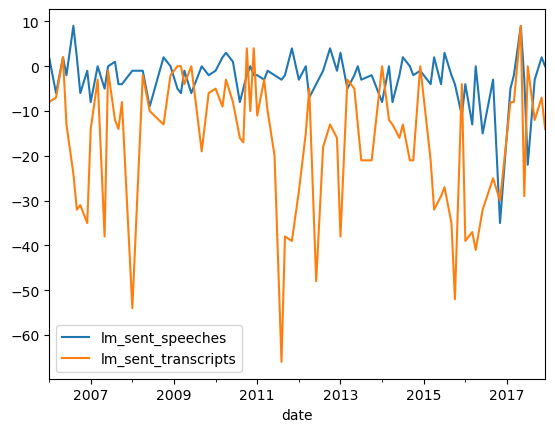

In [227]:
merged_inf = pd.merge(sinfdf, tinfdf, on='date', suffixes=['_speeches', '_transcripts'])
merged_inf.plot()
# merged_inf

<Axes: xlabel='date'>

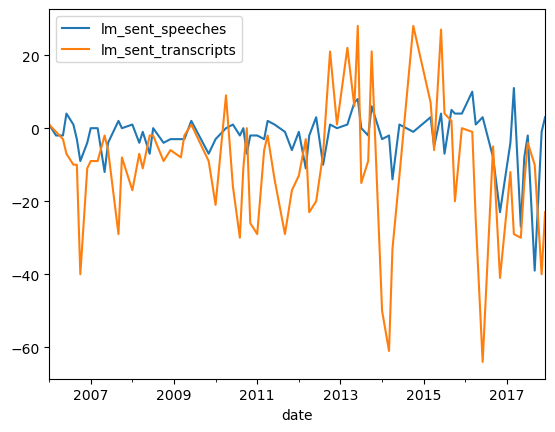

In [238]:
merged_grow = pd.merge(sgrowdf, tgrowdf, on='date', suffixes=['_speeches', '_transcripts'])
merged_grow.plot()